In [ ]:
import kagglehub
path = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")
print("Path to dataset files:", path)

100%|██████████| 105M/105M [00:01<00:00, 75.9MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3"

train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

# TODO :
1. Display Sample Data Here

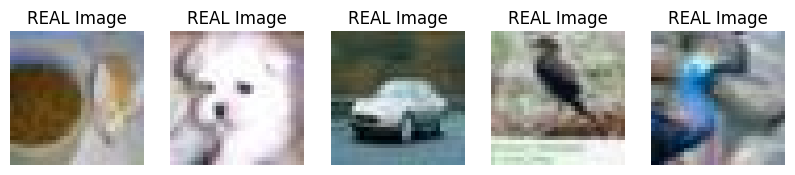

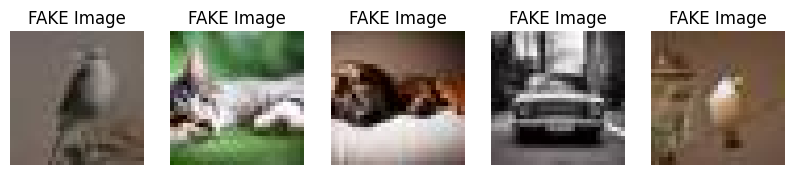

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os

# Set the path to your dataset
dataset_path = "/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3"
# Correct paths to the training and testing folders
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

# Function to display a grid of sample images
def visualize_sample_images(directory, class_name, num_images=5):
    class_dir = os.path.join(directory, class_name)
    image_files = os.listdir(class_dir)[:num_images]

    plt.figure(figsize=(10, 10))

    for i, image_file in enumerate(image_files):
        img_path = os.path.join(class_dir, image_file)
        img = load_img(img_path, target_size=(32, 32))
        img_array = img_to_array(img)

        plt.subplot(1, num_images, i+1)
        plt.imshow(np.uint8(img_array))
        plt.title(f'{class_name} Image')
        plt.axis('off')

    plt.show()

# Example: Visualize images from both classes (REAL and FAKE)
visualize_sample_images(train_dir, 'REAL', num_images=5)
visualize_sample_images(train_dir, 'FAKE', num_images=5)

In [ ]:
import tensorflow as tf  # Import TensorFlow library
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator for image preprocessing
from keras.applications.vgg16 import VGG16  # Import VGG16 model
from keras.optimizers import Adam  # Import Adam optimizer
from keras.models import Model, load_model  # Import Sequential and Model for defining neural network models
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, GlobalAveragePooling2D  # Import various layers from Keras
import warnings  # Import warnings module
import os  # Import os module
from sklearn.utils import compute_class_weight
warnings.filterwarnings('ignore')  # Ignore warnings
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score  # Import various metrics for model evaluation
import seaborn as sns  # Import seaborn for confusion matrix visualization

In [ ]:
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(
    rotation_range=90,
    rescale=1/255.,
    brightness_range=[0.5, 1.0],
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.15
)

test_datagen = ImageDataGenerator(
    rescale=1/255.
)

In [ ]:
# Create a data generator for the training set
train_generator = train_datagen.flow_from_directory(
                                train_dir,  # Directory containing training images
                                target_size=(32, 32),  # Resize images to 224x224 pixels
                                class_mode='binary',  # Binary classification
                                subset='training',  # Subset of data (training)
                                batch_size=BATCH_SIZE,  # Batch size
                                shuffle=True,  # Shuffle data
                                seed=42  # Random seed for reproducibility
)

# Create a data generator for the validation set
valid_generator = train_datagen.flow_from_directory(
                                train_dir,
                                target_size=(32, 32),
                                class_mode='binary',
                                subset='validation',  # Subset of data (validation)
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                seed=42
)

# Create a data generator for the test set
test_generator = test_datagen.flow_from_directory(
                                test_dir,
                                target_size=(32, 32),  # Do not return class labels
                                class_mode='binary',
                                batch_size=1,  # Batch size (set to 1 for prediction)
                                shuffle=False,  # Do not shuffle data
                                seed=42
)

Found 85000 images belonging to 2 classes.
Found 15000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:

# Importing libraries
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# def build_model():
#   model = models.Sequential()
#   model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#   model.add(layers.MaxPooling2D((2, 2)))

#   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#   model.add(layers.MaxPooling2D((2, 2)))

#   model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#   model.add(layers.MaxPooling2D((2, 2)))

#   model.add(layers.Flatten())
#   model.add(layers.Dense(128, activation='relu'))
#   model.add(layers.Dropout(0.5))

#   model.add(layers.Dense(1, activation='sigmoid'))
#   model.add(layers.Dense(10, activation='softmax'))

#   model.compile(optimizer='adam',
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])

#   return model



def build_model():
    model = models.Sequential()

    # Convolutional Layers with Batch Normalization
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(1, activation='sigmoid'))  # Single unit for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = build_model()
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,057 (1.36 MB)

 Trainable params: 356,353 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
for x, y in train_generator:
    print(f"Input shape: {x.shape}, Label shape: {y.shape}")
    break
for x, y in valid_generator:
    print(f"Validation input shape: {x.shape}, Label shape: {y.shape}")
    break


Input shape: (16, 32, 32, 3), Label shape: (16,)
Validation input shape: (16, 32, 32, 3), Label shape: (16,)


In [ ]:
# history = model.fit(
#     train_generator,
#     epochs=EPOCHS,
#     validation_data=valid_generator,  # Use the validation generator
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#         tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
#     ]
# )


history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',  # Monitors validation loss
            patience=5,  # Stops training after 5 epochs of no improvement
            restore_best_weights=True  # Restores weights of the best epoch
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',  # Monitors validation loss
            factor=0.2,  # Reduces learning rate by a factor of 5 (current_lr * 0.2)
            patience=3,  # Waits 3 epochs without improvement before reducing the LR
            verbose=1,  # Logs learning rate adjustments
            min_lr=1e-6  # Sets a minimum learning rate
        )
    ]
)



Epoch 1/20
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 147s 26ms/step - accuracy: 0.6975 - loss: 0.6112 - val_accuracy: 0.7096 - val_loss: 0.5455 - learning_rate: 0.0010
Epoch 2/20
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 136s 26ms/step - accuracy: 0.7956 - loss: 0.4443 - val_accuracy: 0.7808 - val_loss: 0.4679 - learning_rate: 0.0010
Epoch 3/20
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 143s 27ms/step - accuracy: 0.8071 - loss: 0.4232 - val_accuracy: 0.8009 - val_loss: 0.4277 - learning_rate: 0.0010
Epoch 4/20
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 135s 25ms/step - accuracy: 0.8157 - loss: 0.4084 - val_accuracy: 0.8403 - val_loss: 0.3640 - learning_rate: 0.0010
Epoch 5/20
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 141s 25ms/step - accuracy: 0.8161 - loss: 0.4037 - val_accuracy: 0.7473 - val_loss: 0.4986 - learning_rate: 0.0010
Epoch 6/20
5313/5313 ━━━━━━━━━━━━━━━━━━━━ 140s 25ms/step - accuracy: 0.8243 - loss: 0.3906 - val_accuracy: 0.8161 - val_loss: 0.3998 - learning_rate: 0.0010
Epoch 7/20
5305/5313 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - a

In [ ]:
model.save('custom_model.keras')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_and_visualize(model, test_generator, history, class_names):
    # Evaluate the model on the test set
    print("\nEvaluating the Model on Test Data...")
    loss, accuracy = model.evaluate(test_generator, verbose=1)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Predict labels on the test set
    print("\nGenerating Predictions...")
    predictions = model.predict(test_generator, verbose=1)
    predicted_labels = (predictions > 0.5).astype("int32").flatten()

    # Retrieve true labels from the test generator
    true_labels = test_generator.classes

    # Classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=class_names))

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(true_labels, predicted_labels)
    print(cm)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    # Plot training history (loss and accuracy)
    print("\nPlotting Training History...")
    plt.figure(figsize=(12, 5))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


['FAKE', 'REAL']

Evaluating the Model on Test Data...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9165 - loss: 0.2400
Test Loss: 0.6941
Test Accuracy: 0.7577

Generating Predictions...
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.68      0.99      0.80     10000
        REAL       0.98      0.53      0.69     10000

    accuracy                           0.76     20000
   macro avg       0.83      0.76      0.74     20000
weighted avg       0.83      0.76      0.74     20000


Confusion Matrix:
[[9886  114]
 [4731 5269]]


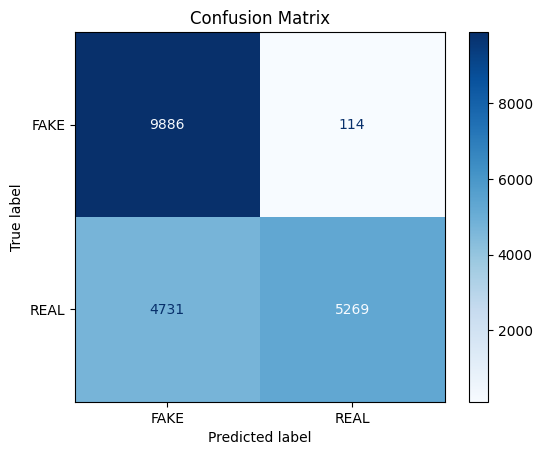


Plotting Training History...


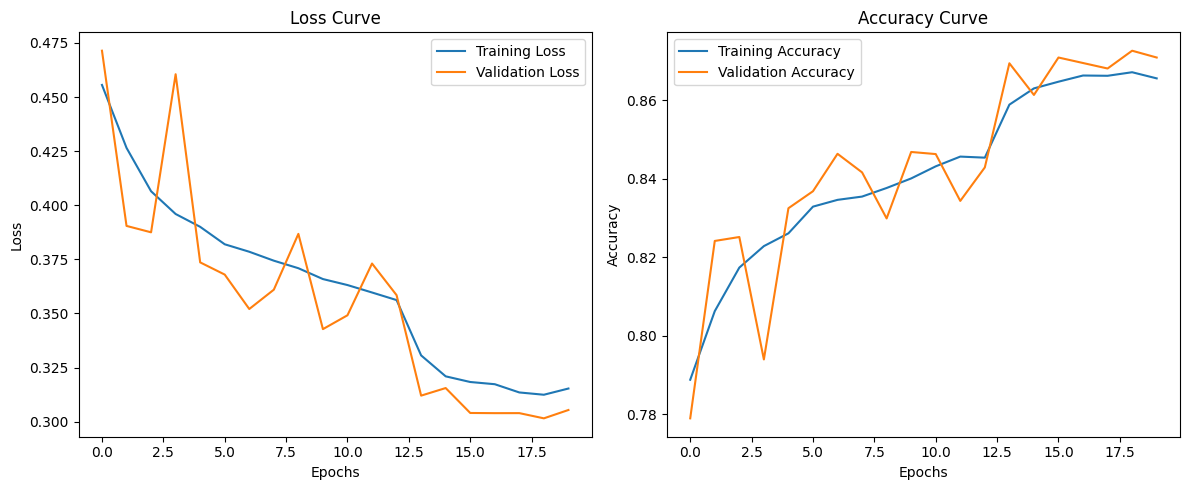

In [ ]:
# Class names (based on test generator directory structure)
class_names = list(test_generator.class_indices.keys())
print(class_names)

# Call the combined evaluation and visualization function
evaluate_and_visualize(model=model, test_generator=test_generator, history=history, class_names=class_names)


In [ ]:
from sklearn.metrics import precision_recall_curve

y_true = valid_generator.classes
y_pred = model.predict(valid_generator)

precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred)

# Select threshold that maximizes the F1 score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_image(model_path, image_path, target_size=(32, 32)):
    """
    Predict whether an image is FAKE or REAL using a trained .keras model.

    Parameters:
        model_path: Path to the saved .keras model file.
        image_path: Path to the image file.
        class_names: List of class names (e.g., ['FAKE', 'REAL']).
        target_size: Tuple specifying the image size (default: (244, 244)).

    Returns:
        str: Predicted class label ("FAKE" or "REAL").
    """
    class_names = ['FAKE', 'REAL']

    # Load the model
    model = load_model(model_path)

    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(img_array)
    print(prediction)
    predicted_class = class_names[int(prediction[0] > optimal_threshold)]  # Map prediction to class label

    return predicted_class


In [ ]:
# File paths
model_path = 'custom_model.keras'  # Path to your .keras model file
image_path = 'image.jpg'    # Path to the image to predict

# Define the class names (order matters and should match the model's training)

# Predict the image's class
predicted_class = predict_image(model_path=model_path, image_path=image_path)
print(f"The image is predicted to be: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
[[6.230802e-09]]
The image is predicted to be: FAKE
